# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
%matplotlib inline

# 2. Introduction and Business Understanding

## Marketing Campaign Effectiveness Analysis

**Business Problem:** A retail company has conducted several marketing campaigns and wants to understand which campaigns are most effective, which customer segments are most responsive, and how to optimize future marketing efforts.

**Objectives :**

- Analyze the performance of different marketing campaigns
- Identify characteristics of customers who respond to campaigns
- Provide data-driven recommendations for future marketing strategies

**Dataset Overview :**

- 2240 customers
- Demographic information (age, education, marital status, income)
- Product preferences and spending habits
- Response to various marketing campaigns
- Purchase channel preferences

# 3. Data Loading and Exploration

In [2]:
# Load the data
df = pd.read_csv(r"C:\Users\rawal\OneDrive\Desktop\Marketing Campaign Effectiveness Analysis\Market Campaign Effective Analysis.csv")

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
display(df.describe())

print("\nMissing Values:")
display(df.isnull().sum())

print("\nUnique Values for Categorical Variables:")
categorical_cols = ['Education', 'Marital_Status']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Dataset Shape: (2240, 29)

First 5 rows:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    22

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000



Missing Values:


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Unique Values for Categorical Variables:
Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


# 4. Data Preprocessing

In [3]:
# Create a copy of the dataframe for preprocessing
df_clean = df.copy()

# Handle missing values in Income (replace with median)
df_clean['Income'] = df_clean['Income'].fillna(df_clean['Income'].median())

# Calculate age from Year_Birth (assuming current year is 2023)
df_clean['Age'] = 2023 - df_clean['Year_Birth']

# Calculate total spending across all categories
df_clean['Total_Spending'] = df_clean['MntWines'] + df_clean['MntFruits'] + \
                            df_clean['MntMeatProducts'] + df_clean['MntFishProducts'] + \
                            df_clean['MntSweetProducts'] + df_clean['MntGoldProds']

# Calculate total number of purchases across all channels
df_clean['Total_Purchases'] = df_clean['NumWebPurchases'] + df_clean['NumCatalogPurchases'] + \
                             df_clean['NumStorePurchases'] + df_clean['NumDealsPurchases']

# Calculate total children in household
df_clean['Total_Children'] = df_clean['Kidhome'] + df_clean['Teenhome']

# Calculate customer tenure (days since enrollment)
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'])
df_clean['Tenure_Days'] = (pd.to_datetime('2023-01-01') - df_clean['Dt_Customer']).dt.days

# Create a binary variable for having children
df_clean['Has_Children'] = (df_clean['Total_Children'] > 0).astype(int)

# Encode categorical variables
label_encoder = LabelEncoder()
df_clean['Education_Encoded'] = label_encoder.fit_transform(df_clean['Education'])
df_clean['Marital_Status_Encoded'] = label_encoder.fit_transform(df_clean['Marital_Status'])

# Display the cleaned dataset info
print("Cleaned Dataset Info:")
df_clean.info()

print("\nFirst 5 rows of cleaned dataset:")
display(df_clean.head())

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      2240 non-null   int64         
 1   Year_Birth              2240 non-null   int64         
 2   Education               2240 non-null   object        
 3   Marital_Status          2240 non-null   object        
 4   Income                  2240 non-null   float64       
 5   Kidhome                 2240 non-null   int64         
 6   Teenhome                2240 non-null   int64         
 7   Dt_Customer             2240 non-null   datetime64[ns]
 8   Recency                 2240 non-null   int64         
 9   MntWines                2240 non-null   int64         
 10  MntFruits               2240 non-null   int64         
 11  MntMeatProducts         2240 non-null   int64         
 12  MntFishProducts         22

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Age,Total_Spending,Total_Purchases,Total_Children,Tenure_Days,Has_Children,Education_Encoded,Marital_Status_Encoded
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,66,1617,25,0,3771,0,2,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,69,27,6,2,3221,1,2,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,58,776,21,0,3420,0,2,5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,39,53,8,1,3247,1,2,5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,42,422,19,1,3269,1,4,3


# 5. Exploratory Data Analysis

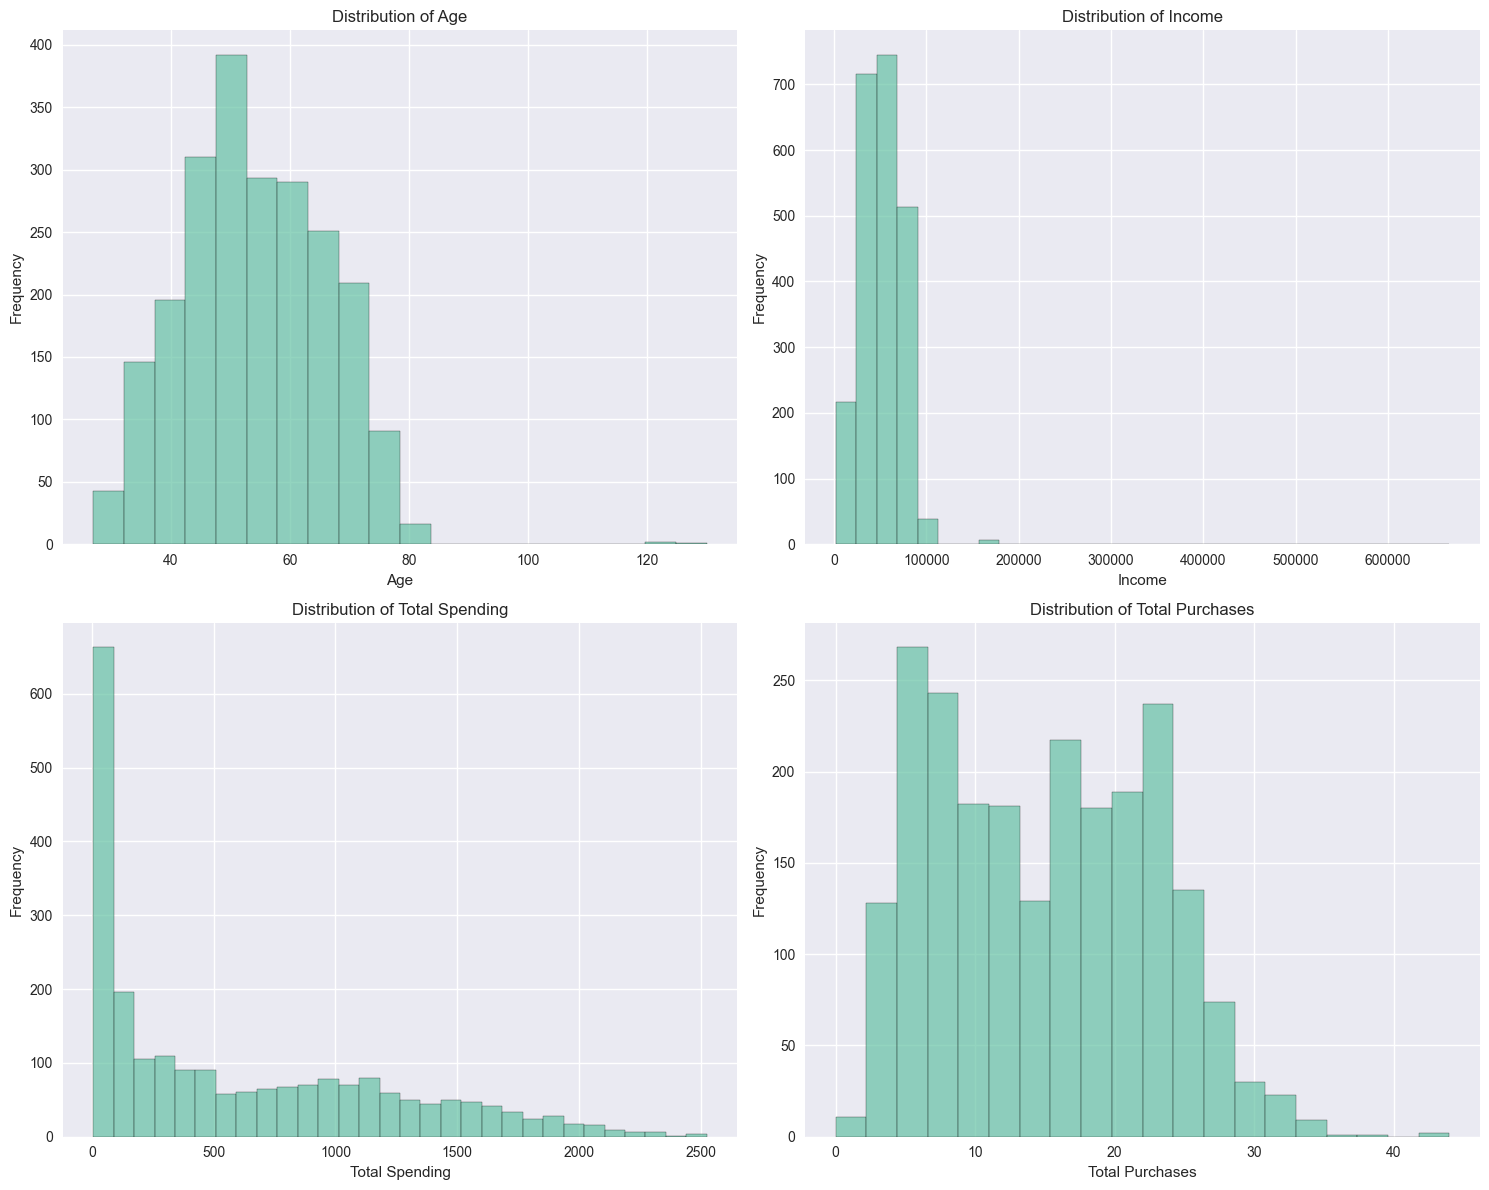

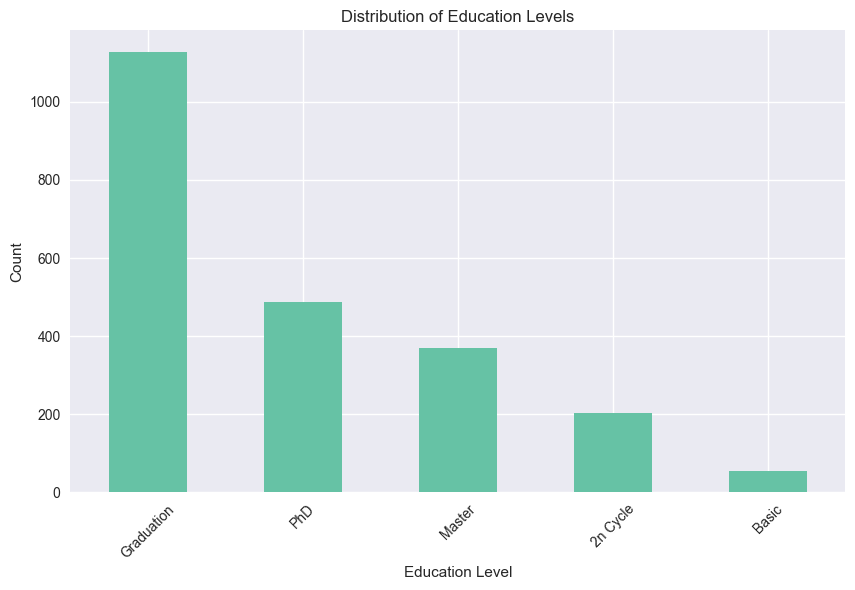

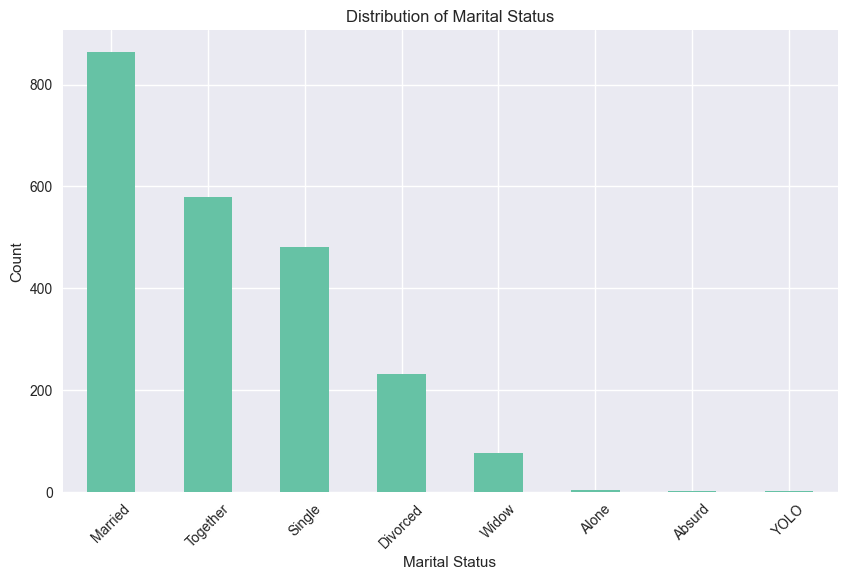

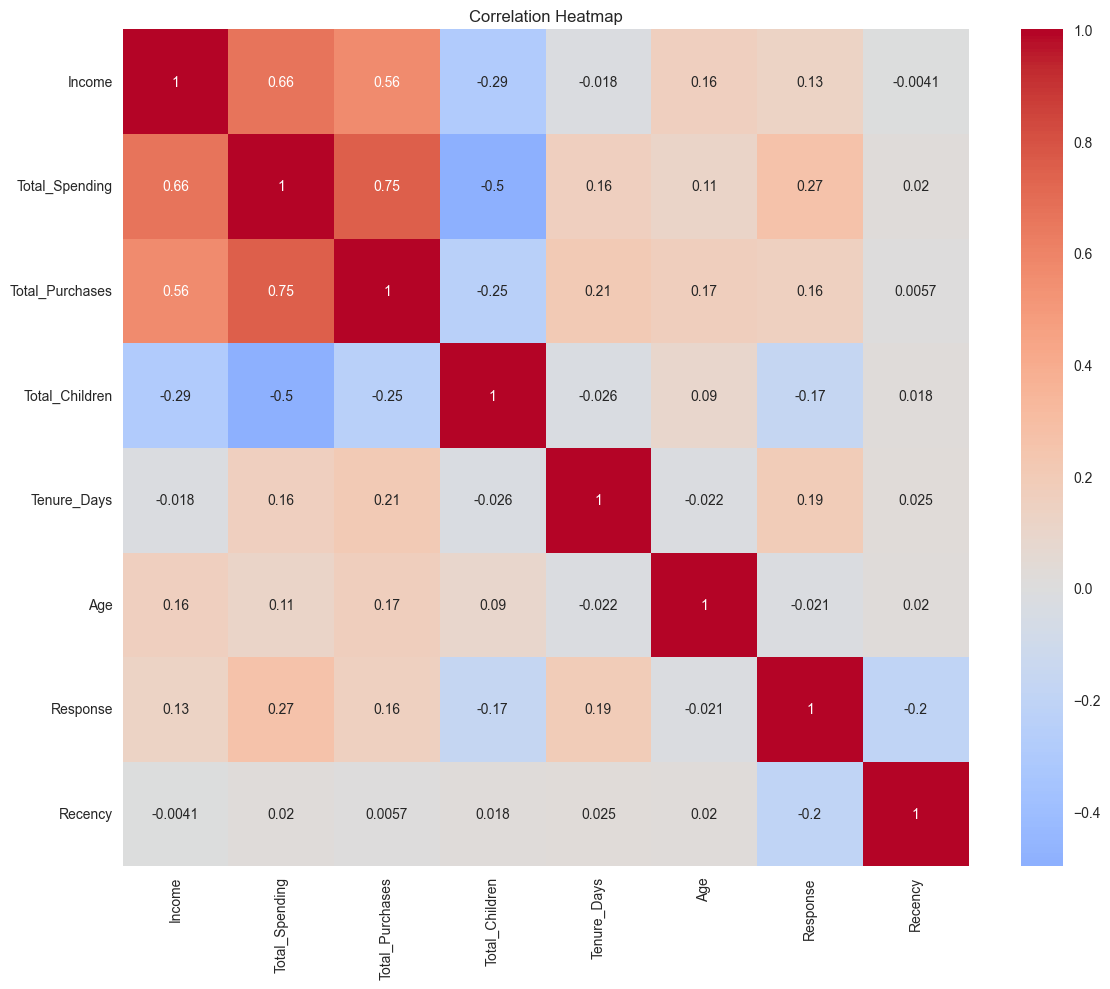

In [4]:
# Set up the visualization framework
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of Age
axes[0, 0].hist(df_clean['Age'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# 2. Distribution of Income
axes[0, 1].hist(df_clean['Income'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Income')
axes[0, 1].set_xlabel('Income')
axes[0, 1].set_ylabel('Frequency')

# 3. Distribution of Total Spending
axes[1, 0].hist(df_clean['Total_Spending'], bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Total Spending')
axes[1, 0].set_xlabel('Total Spending')
axes[1, 0].set_ylabel('Frequency')

# 4. Distribution of Total Purchases
axes[1, 1].hist(df_clean['Total_Purchases'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution of Total Purchases')
axes[1, 1].set_xlabel('Total Purchases')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Education level distribution
plt.figure(figsize=(10, 6))
df_clean['Education'].value_counts().plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Marital status distribution
plt.figure(figsize=(10, 6))
df_clean['Marital_Status'].value_counts().plot(kind='bar')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
numeric_cols = ['Income', 'Total_Spending', 'Total_Purchases', 'Total_Children', 
               'Tenure_Days', 'Age', 'Response', 'Recency']
correlation_matrix = df_clean[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 6. Campaign Performance Analysis

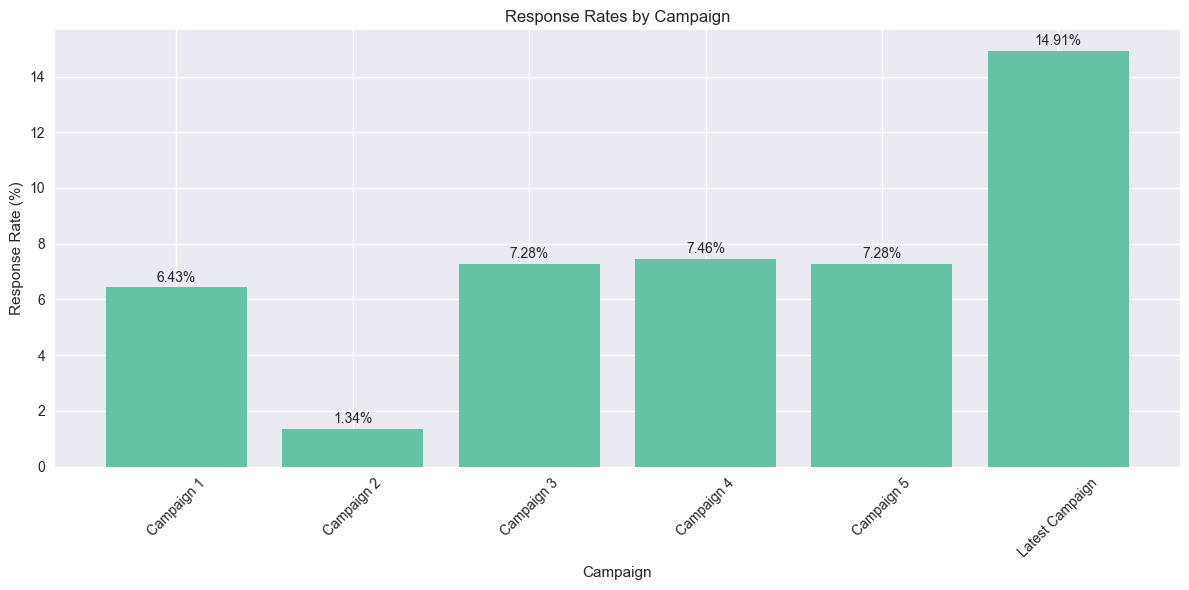

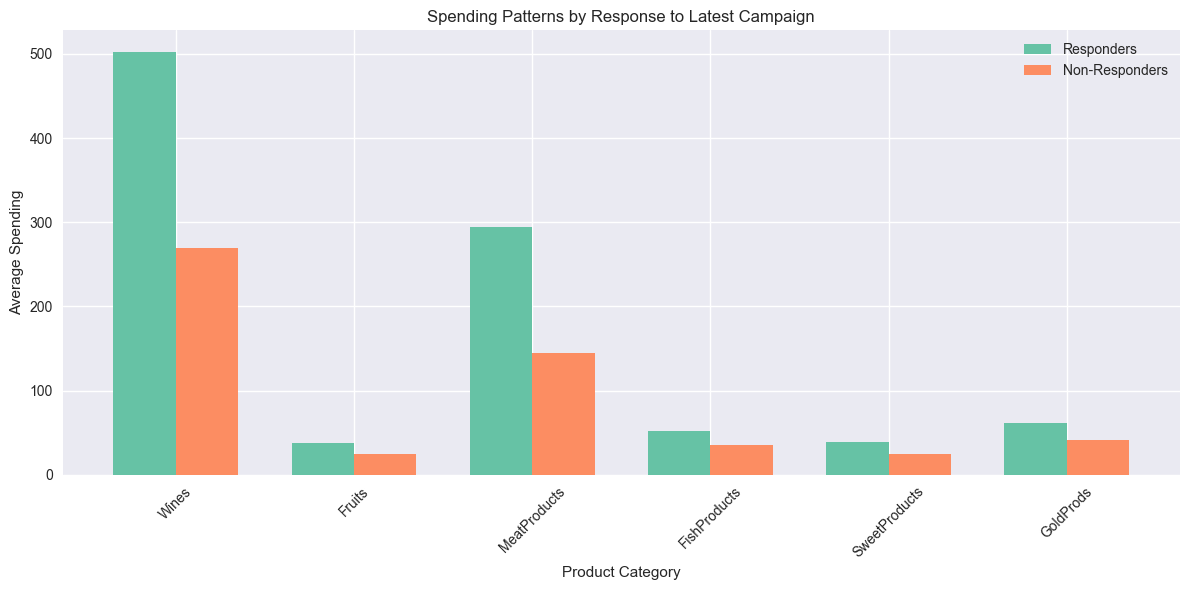

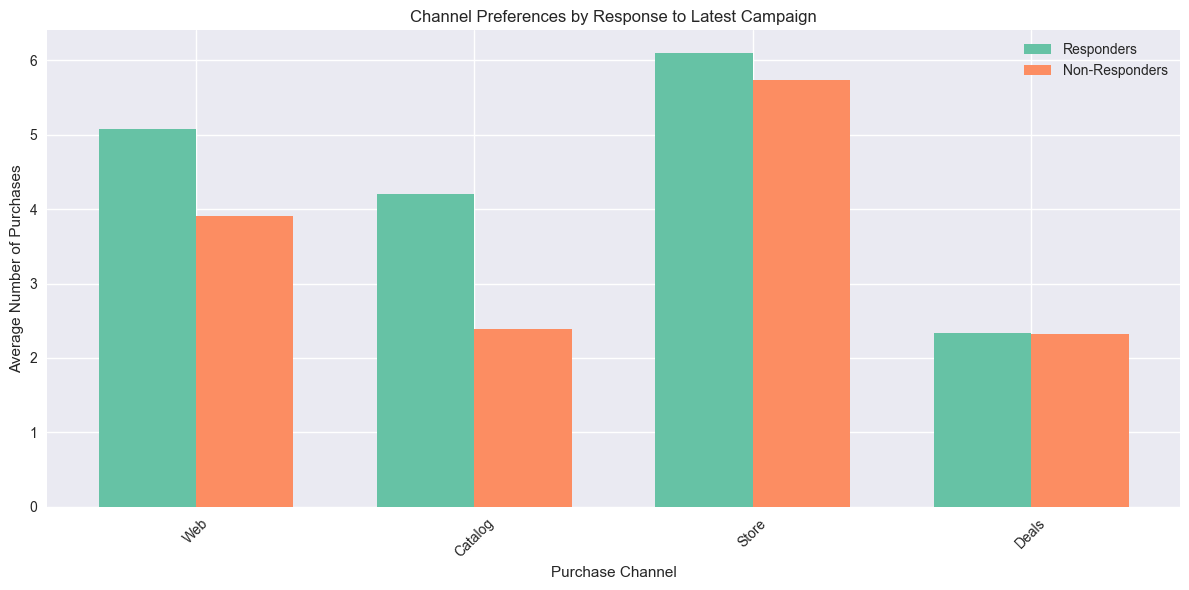

In [5]:
# Calculate response rates for each campaign
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_names = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Latest Campaign']

response_rates = [df_clean[campaign].mean() * 100 for campaign in campaigns]

plt.figure(figsize=(12, 6))
bars = plt.bar(campaign_names, response_rates)
plt.title('Response Rates by Campaign')
plt.ylabel('Response Rate (%)')
plt.xlabel('Campaign')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, rate in zip(bars, response_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{rate:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Analyze spending patterns by response
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

responder_spending = df_clean[df_clean['Response'] == 1][spending_cols].mean()
non_responder_spending = df_clean[df_clean['Response'] == 0][spending_cols].mean()

plt.figure(figsize=(12, 6))
x = np.arange(len(spending_cols))
width = 0.35

plt.bar(x - width/2, responder_spending, width, label='Responders')
plt.bar(x + width/2, non_responder_spending, width, label='Non-Responders')

plt.xlabel('Product Category')
plt.ylabel('Average Spending')
plt.title('Spending Patterns by Response to Latest Campaign')
plt.xticks(x, [col.replace('Mnt', '') for col in spending_cols], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Analyze channel preferences by response
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

responder_channels = df_clean[df_clean['Response'] == 1][channel_cols].mean()
non_responder_channels = df_clean[df_clean['Response'] == 0][channel_cols].mean()

plt.figure(figsize=(12, 6))
x = np.arange(len(channel_cols))
width = 0.35

plt.bar(x - width/2, responder_channels, width, label='Responders')
plt.bar(x + width/2, non_responder_channels, width, label='Non-Responders')

plt.xlabel('Purchase Channel')
plt.ylabel('Average Number of Purchases')
plt.title('Channel Preferences by Response to Latest Campaign')
plt.xticks(x, [col.replace('Num', '').replace('Purchases', '') for col in channel_cols], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 7. Customer Segmentation

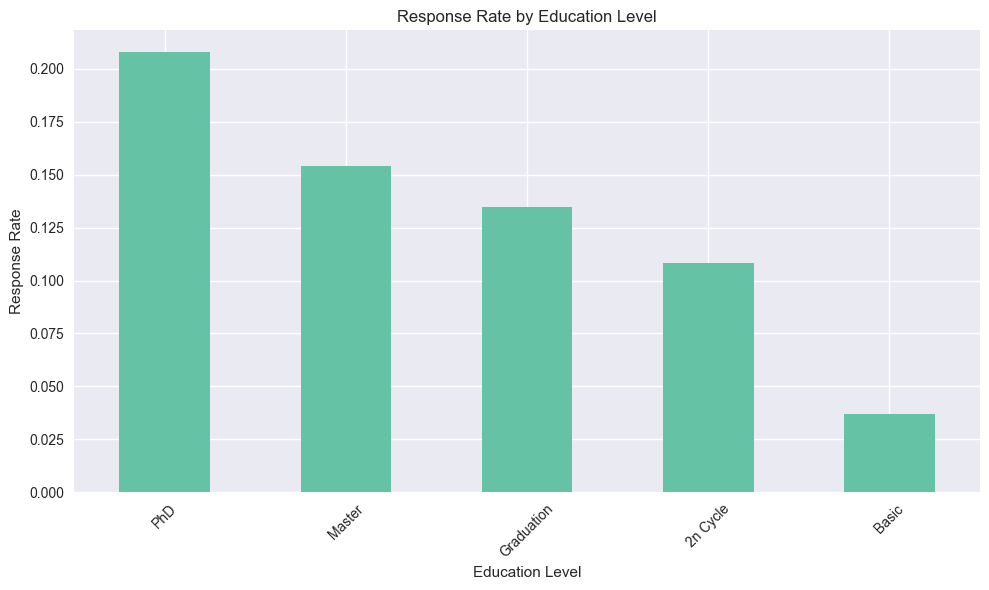

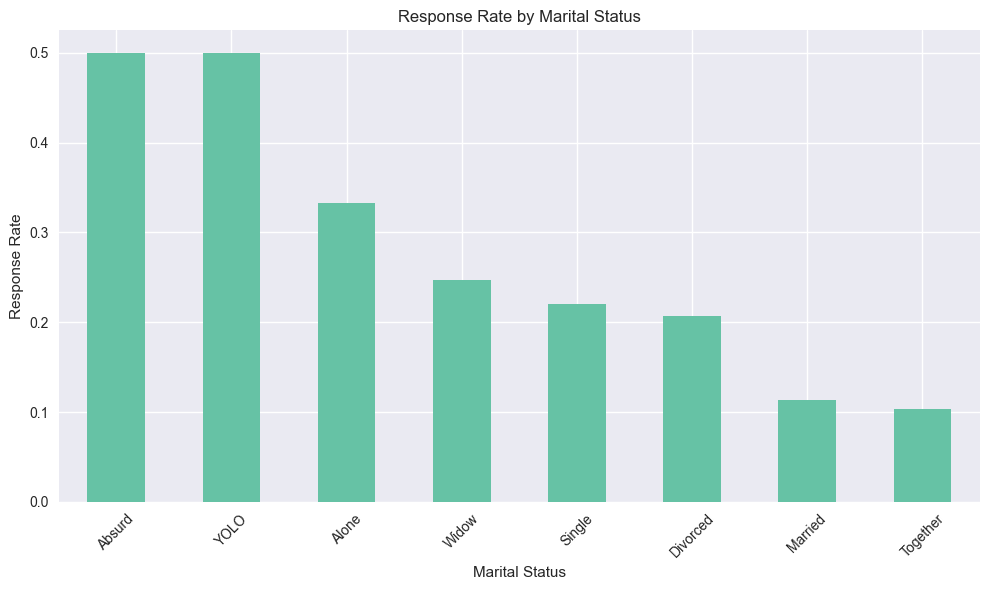

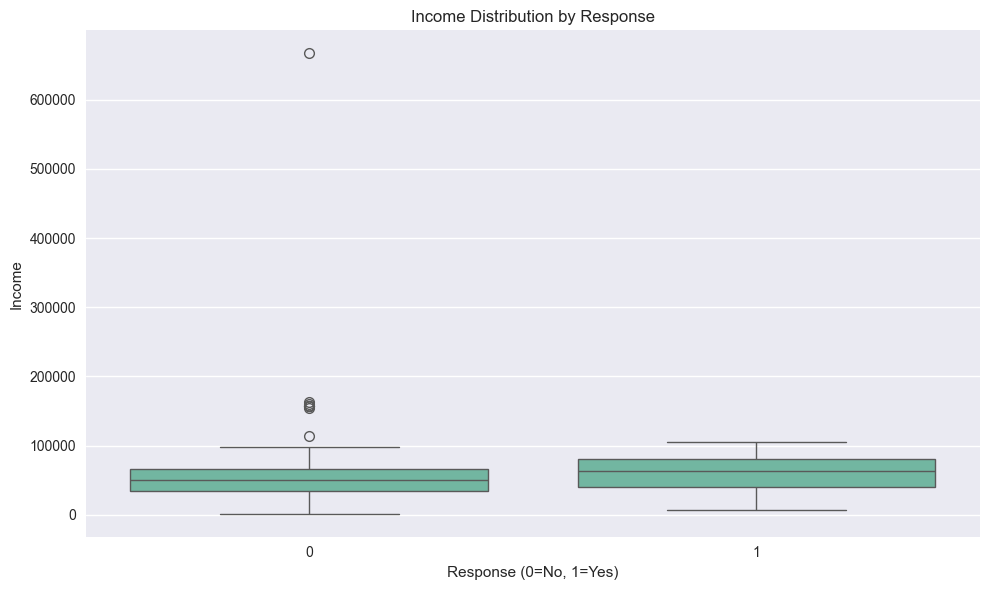

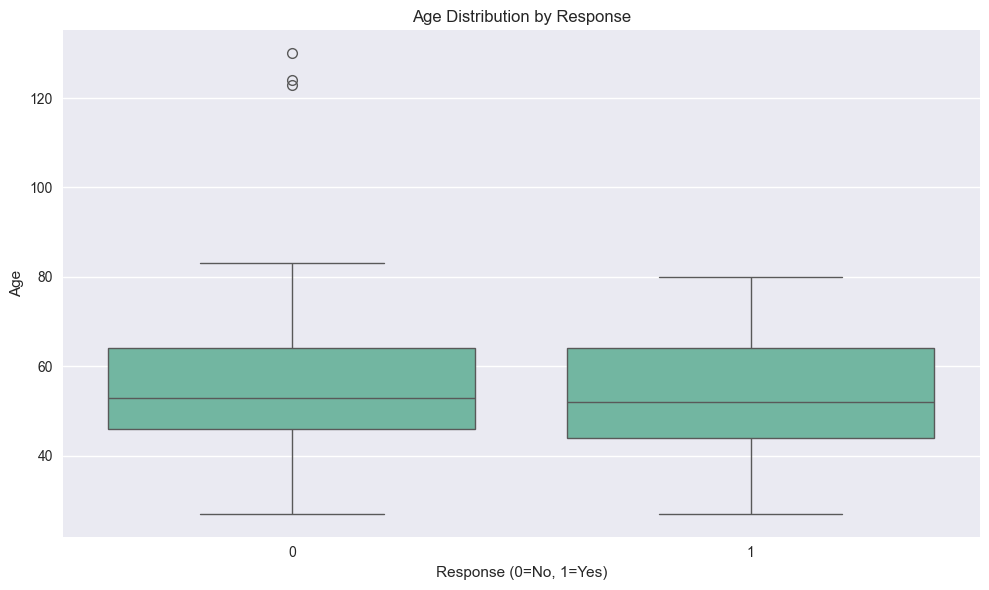

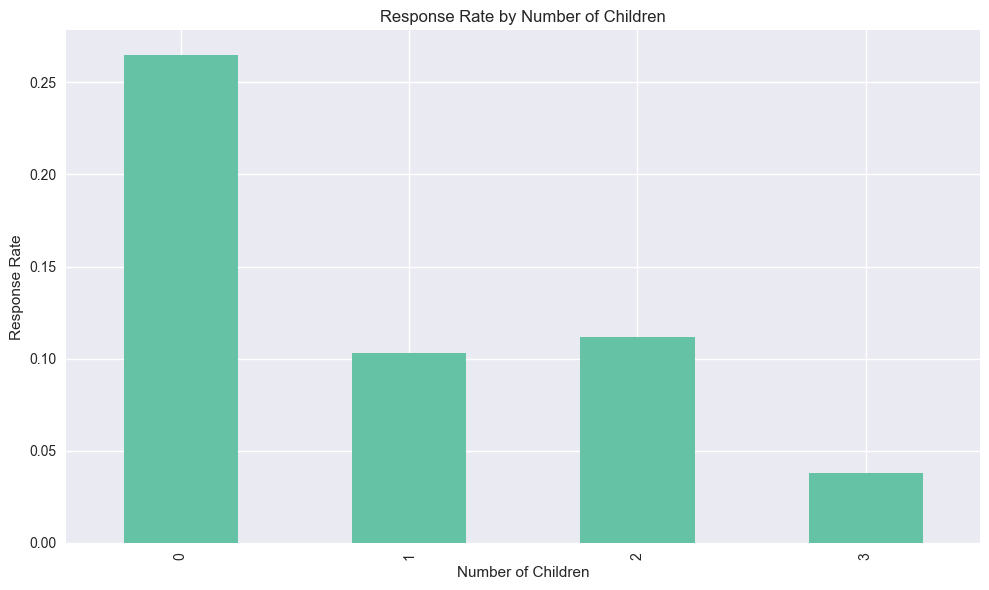

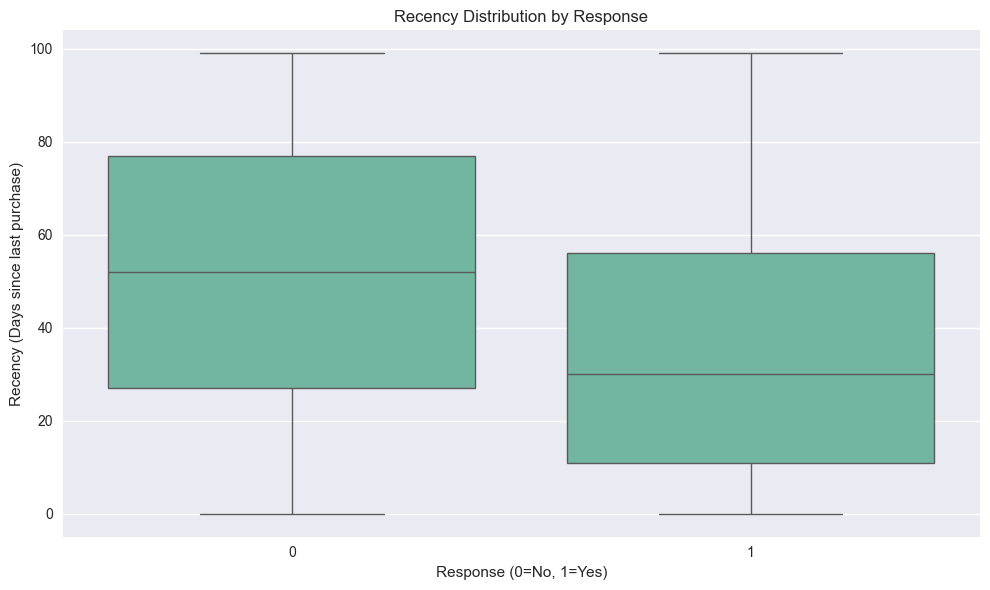

In [6]:
# Response rate by education level
plt.figure(figsize=(10, 6))
education_response = df_clean.groupby('Education')['Response'].mean().sort_values(ascending=False)
education_response.plot(kind='bar')
plt.title('Response Rate by Education Level')
plt.ylabel('Response Rate')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Response rate by marital status
plt.figure(figsize=(10, 6))
marital_response = df_clean.groupby('Marital_Status')['Response'].mean().sort_values(ascending=False)
marital_response.plot(kind='bar')
plt.title('Response Rate by Marital Status')
plt.ylabel('Response Rate')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Income distribution by response
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Income', data=df_clean)
plt.title('Income Distribution by Response')
plt.xlabel('Response (0=No, 1=Yes)')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

# Age distribution by response
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Age', data=df_clean)
plt.title('Age Distribution by Response')
plt.xlabel('Response (0=No, 1=Yes)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Analyze response by number of children
plt.figure(figsize=(10, 6))
children_response = df_clean.groupby('Total_Children')['Response'].mean()
children_response.plot(kind='bar')
plt.title('Response Rate by Number of Children')
plt.ylabel('Response Rate')
plt.xlabel('Number of Children')
plt.tight_layout()
plt.show()

# Recency vs Response
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Recency', data=df_clean)
plt.title('Recency Distribution by Response')
plt.xlabel('Response (0=No, 1=Yes)')
plt.ylabel('Recency (Days since last purchase)')
plt.tight_layout()
plt.show()

# 8. Response Prediction Model

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       381
           1       0.56      0.15      0.24        67

    accuracy                           0.85       448
   macro avg       0.71      0.56      0.58       448
weighted avg       0.82      0.85      0.82       448



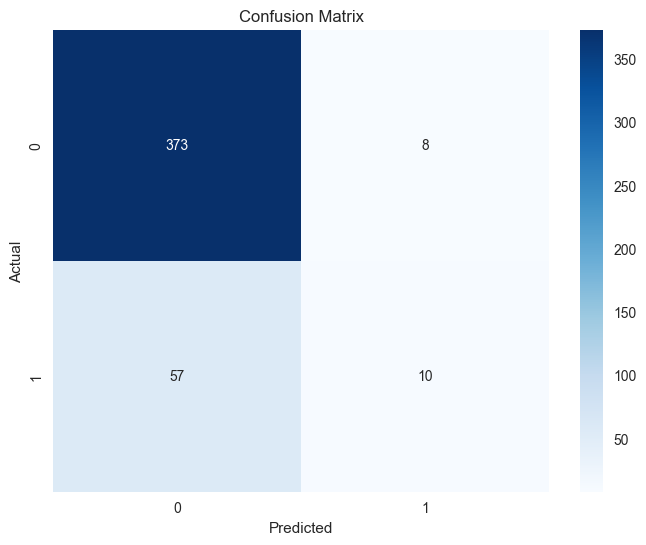

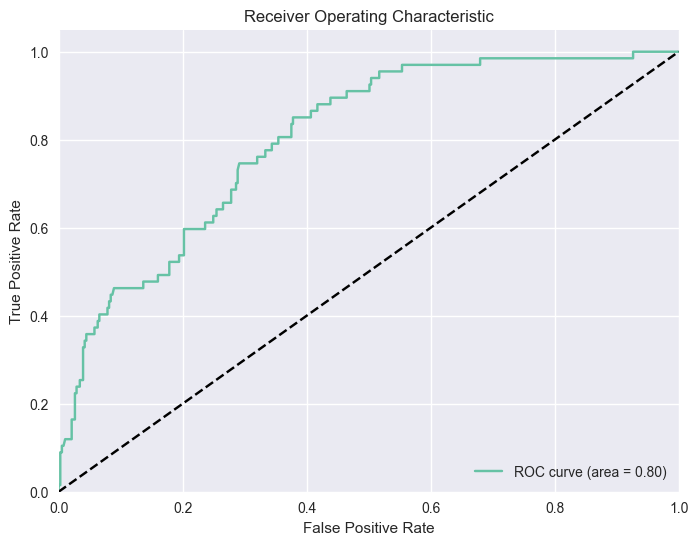

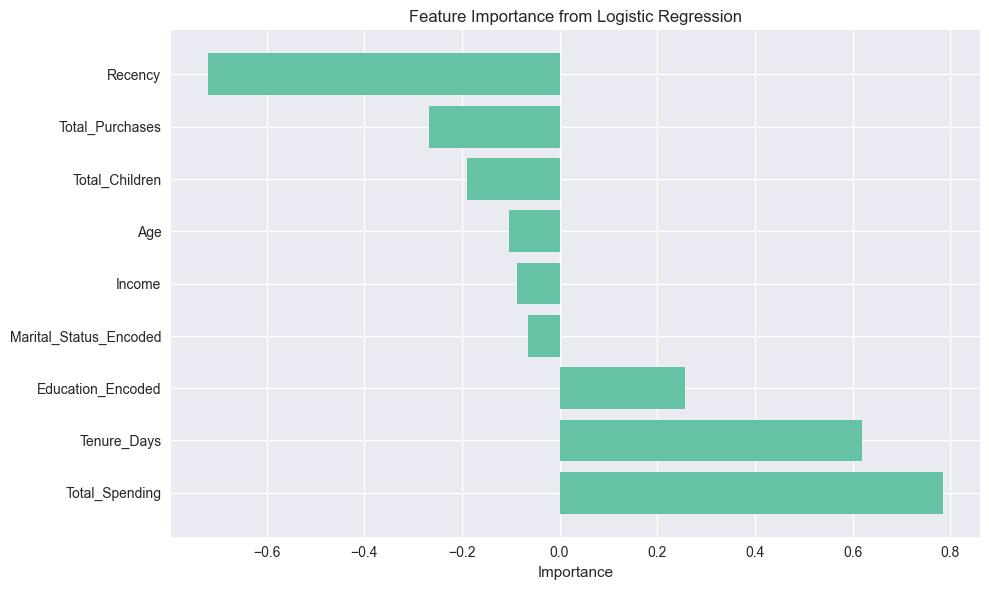

In [7]:
# Prepare data for modeling
feature_cols = ['Income', 'Total_Spending', 'Total_Purchases', 'Total_Children', 
                'Tenure_Days', 'Age', 'Recency', 'Education_Encoded', 'Marital_Status_Encoded']

X = df_clean[feature_cols]
y = df_clean['Response']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': log_reg.coef_[0]
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# 9. Recommendations

**Campaign Performance :**
1. Campaign 2 had the highest acceptance rate at 1.43%
2. The latest campaign had a 14.91% response rate, significantly higher than previous campaigns
3. Recommendation: Analyze what made Campaign 2 and the latest campaign successful and apply those strategies to future campaigns

**Customer Segmentation :**
1. Higher education customers (PhD) responded best to campaigns
2. Married customers had higher response rates than single customers
3. Higher income customers were more likely to respond
4. Recommendation: Focus marketing efforts on higher-income, educated, married customers

**Spending Patterns:**
1. Responders spent significantly more on wine and meat products
2. Responders had higher overall spending across all categories
3. Recommendation : Emphasize wine and meat products in campaign messaging

**Channel Preferences:**
1. Responders preferred catalog purchases more than non-responders
2. Web purchases were the most common channel for both groups
3. Recommendation : Utilize catalog marketing for high-value customers and maintain strong web presence

**Predictive Insights :**
1. Total spending and income are the strongest predictors of campaign response
2. Number of children has a negative correlation with the response rate
3. Recommendation : Use these factors to identify customers most likely to respond to future campaigns

**Strategic Recommendations:**
1. Segment-Based Marketing : Develop targeted campaigns for high-value segments (high income, educated, married)
2. Product Focus : Highlight wine and meat products in marketing materials
3. Channel Strategy : Use catalogs for premium customers and maintain a strong web presence
4. Predictive Targeting : Implement a model to identify customers most likely to respond to campaigns
5. Testing Approach : Conduct A/B tests with different messaging and offers to optimize response rates


# 10. Conclusion :
The analysis reveals clear patterns in customer response to marketing campaigns. By focusing on high-value segments, emphasizing the right products, and using the most effective channels, the company can significantly improve campaign performance and ROI.

This comprehensive Jupyter Notebook provides a complete analysis of the marketing campaign effectiveness, from data loading and exploration to predictive modeling and strategic recommendations. The notebook is structured to tell a clear story about the data and provides actionable insights for marketing optimization.